# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

Given that profit is generally calculated as a revenue minus cost, I think it would be important to calculate the difference in 'State Bottle Retail' and 'State Bottle Cost' for each item. Then to understand the most profitable, I would multiply the difference of the Retail price and Bottle Cost by the amount of bottles of that item being sold. The difference in retail price and state cost multiplied by the amount of bottles sold would give us how much profit was generated as a result of that specific item, based on this data set. 

In [72]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
os.chdir("/Users/josephhudson/Desktop/DS_5030_HW_/data")
df=pd.read_csv("iowa.csv")
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [74]:
df["Profit"]=df["State Bottle Retail"]-df["State Bottle Cost"]
df

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,9.05
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,2.42
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,7.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,3.94
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66,4.04
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22,7.41
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50,6.75
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50,6.50


In [75]:
total_profit=df.groupby('Item Description')["Profit"].sum().sort_values(ascending=False)[0:10]
top_drinks=list(total_profit.index)
total_profit


Item Description
TITOS HANDMADE VODKA                        15806.67
FIREBALL CINNAMON WHISKEY MINI DISPENSER    13773.42
BLACK VELVET                                13712.81
CROWN ROYAL                                 11619.02
CROWN ROYAL REGAL APPLE                     10789.51
FIREBALL CINNAMON WHISKEY                    9374.52
JIM BEAM                                     8659.23
HAWKEYE VODKA                                8182.05
JAMESON                                      7926.79
HENNESSY VS                                  7921.71
Name: Profit, dtype: float64

Above is the top 10 liquors by the total amount of profit generated. We can see Titos Handmade Vodka is the number one at over $15000.

In [76]:
top_10=df[df["Item Description"].isin(top_drinks)]

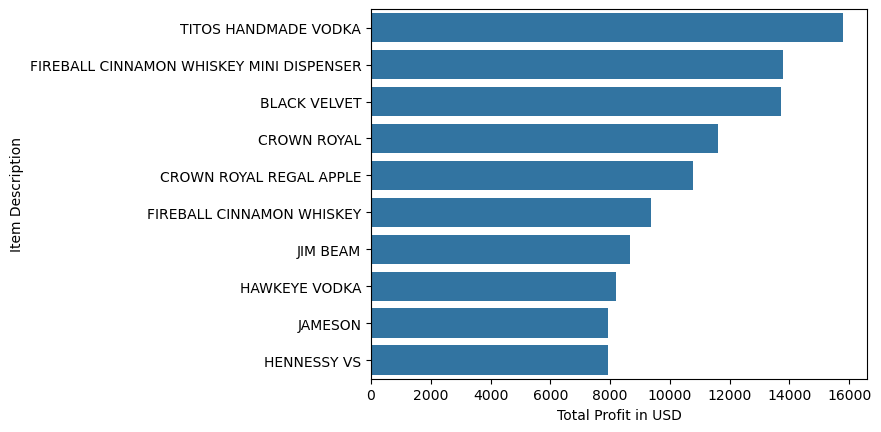

In [77]:
sns.barplot(y=total_profit.index,x=total_profit.values)
plt.ylabel("Item Description")
plt.xlabel("Total Profit in USD")

plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [78]:
x = np.array([1,3,5])
y = np.array([2,5])


In [79]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

If you subtract the two np arrays above from each other, you will get an error message because the vector do not share the same number of elements. 

In [80]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

You get an array, with 3 elements, where each element of the array is a list of 2 elements.

In [81]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

You get an array, with 2 elements,  where each element of the array is a list of 3 elements. The last array was in shape a 3 x 2 array, whule this array is a 2 x 3 array with the same numbers. This second array is essentially the tranpose of the first array.

In [82]:
## for loop for x.reshape(-1,1)-y.reshape(1,-1)

empty_array = np.zeros((len(x),len(y)),dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        empty_array[i,j] = x[i]-y[j]
        
print(empty_array)
        

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


In [83]:
## for loop for x.reshape(1,-1)-y.reshape(-1,1)
empty_array2 = np.zeros((len(y),len(x)),dtype=int)
for i in range(len(y)):
    for j in range(len(x)):
        empty_array2[i,j] = x[j]-y[i]
        
print(empty_array2)

[[-1  1  3]
 [-4 -2  0]]


# Explanation for what the reshape method is doing to x

x starts off as an numpy array with 3 elements, and essentially functions as a linear algebra vector. When using the .reshape(1,-1) method on x, the 3 elements from x are reshaped to a matrix of 1 x 3 dimensions, so each element from the original x is in the same row while being in different columns.

x when transformed using the .reshape(-1,1) method transforms again from a vector of 3 elements, but this time becomes as a 3 x 1 matrix with its original elements. Each of the original elements now have their own row but are all in the same column.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

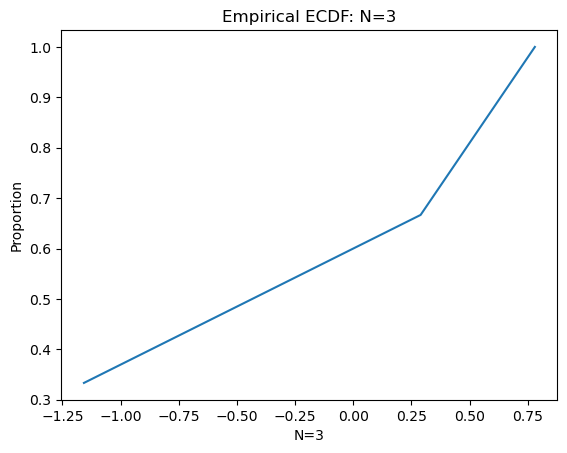

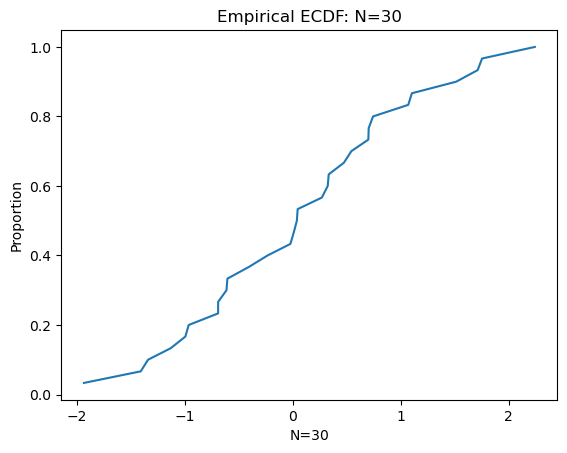

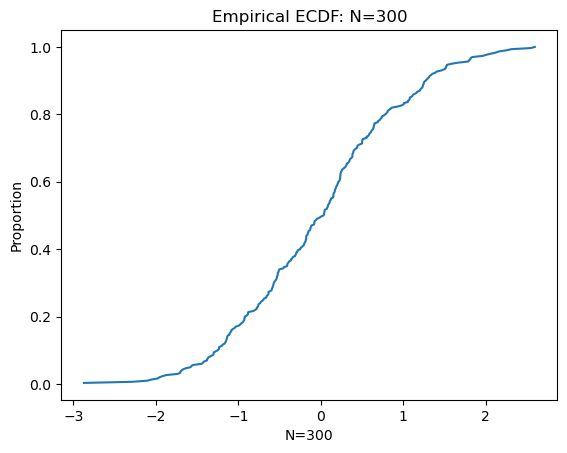

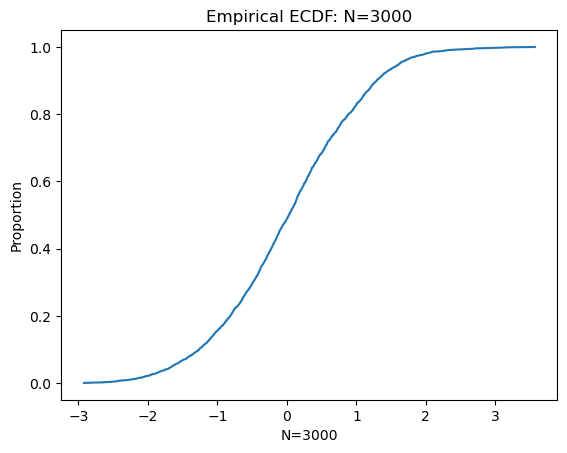

In [84]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)
    #I used the code for ecdf function from 01_visualizing_uncertainty.ipynb file
def ecdf(x,plot=True):
    # Compute ecdf function:
    
    Z = np.sort(np.unique(x)) # Extract and sort unique values for x
    compare = x.reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z

    if plot:
        # Plot the ecdf:
        title_str = f'N={len(x)}'
        plt.plot(Z,ecdf)
        plt.title(f'Empirical ECDF: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

    return ecdf, Z

for N in [3,30,300,3000]:
    X = (rng.normal(0,1,N))
    plt.show()
    plt.clf()
    ecdf(X)


The ECDF smoothes as N increases, with line itself showing the ecdf having less ridges. The ECDF is being fit on more and more data points, so the data is becoming more conitnuous in the sense there are more values close to each other, and the line of the ECDF will then jump around less dramtically and have less ridges. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [85]:
def quantile(x,q):
        x=np.sort(x)
        n=len(x)
        position=q*(n-1)
        if position%1==0:
            return x[int(position)]
        else:
            position=int(position)
            return (x[position]+x[position+1])/2
        
              
        
    # Testing to make sure quantile function works same as numpy function    
test= np.array([1,2,3,34,5,6,7,8,9,10,17,20])


print(np.quantile(test,0.5),quantile(test,0.5))


7.5 7.5


In [86]:
t=range(11)
t

range(0, 11)

In [87]:
def iqr_func (x):
    q1=quantile(x,0.25)
    q3=quantile(x,0.75)
    iqr= q3 -q1
    left_whisker=q1-(1.5*iqr)
    right_whisker=q3+(1.5*iqr)
    return f"q1: {q1},q3: {q3},iqr: {iqr},left_whisker: {left_whisker},right_whisker: {right_whisker}"

iqr_func(test)

'q1: 4.0,q3: 13.5,iqr: 9.5,left_whisker: -10.25,right_whisker: 27.75'

In [88]:
def boxplot_summary(x):
    sorted_array=np.sort(x)
    minimum=sorted_array[0]
    q1=quantile(x,0.25)
    median=quantile(x,0.5)
    q3=quantile(x,0.75)
    iqr=q3-q1
    maximum=sorted_array[-1]
    left_whisker=q1-(1.5*iqr)
    right_whisker=q3+(1.5*iqr)
    return f"min: {minimum}, q1: {q1}, median: {median}, q3: {q3},max: {maximum}, left whsiker: {left_whisker}, right whisker: {right_whisker}"

boxplot_summary(test)

    

'min: 1, q1: 4.0, median: 7.5, q3: 13.5,max: 34, left whsiker: -10.25, right whisker: 27.75'

In [89]:
def outliers(x):
    q1=quantile(x,0.25)
    q3=quantile(x,0.75)
    iqr=q3-q1
    left_whisker=q1-(1.5*iqr)
    right_whisker=q3+(1.5*iqr)
    outlier_vector=[]
    for i in range(len(x)):
        if x[i]<left_whisker or x[i]>right_whisker:
            outlier_vector.append(True)
        else:
            outlier_vector.append(False)
    return outlier_vector

outliers(test)

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

# Comparing my functions with sns.boxplot and df.describe

In [96]:
boxplot_summary(df['Bottle Volume (ml)'])

'min: 20, q1: 750.0, median: 750.0, q3: 1000.0,max: 6000, left whsiker: 375.0, right whisker: 1375.0'

<Axes: xlabel='Bottle Volume (ml)'>

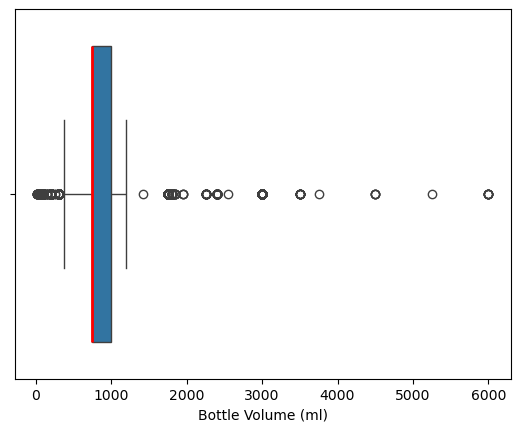

In [97]:
sns.boxplot(data=df,x="Bottle Volume (ml)",medianprops={'color': 'red', 'linewidth': 2})

In [94]:
df["Bottle Volume (ml)"].describe()

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64

The output from the df.describe of the "Bottle Volume (ml)" in the iowa dataset matches all the shared values (like min, 25% quantile, etc) that my boxplot_summary function computes. The seaborn boxplot also appears to match the values of my function, as with a red line use to visualize the median we can see the median is at the left or lower part of the box itself, meaning the median is the same as first quartile which in this case is 750. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

## Left Blank becasue we were told in an announcement on canvas to only do the first four